In [1]:
import pandas as pd

In [2]:
#load the data
data = pd.read_csv("twitter_training.csv")

In [3]:
#Checking the dataset, we found that there are no column names
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
#We add column names: "Id", "Entity", "Target" and "Text"
data.columns = ["Id","Entity","Target","Text"]
data.head()

,Id,Entity,Target,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
#We observe only two columns of interest: "Text" and "Target"
df = data[["Text","Target"]]
df.head()

,Text,Target
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


In [7]:
#Information about our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    73995 non-null  object
 1   Target  74681 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [9]:
df.shape

(74681, 2)

In [10]:
# Import libraries
import re
import string   
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('omw-1.4')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adnan.brankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adnan.brankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adnan.brankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\adnan.brankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\adnan.brankovic\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\adnan.brankovic\AppData\Roa

In [11]:
# Droping duplicates
df= df.drop_duplicates()

<AxesSubplot:xlabel='Target', ylabel='count'>

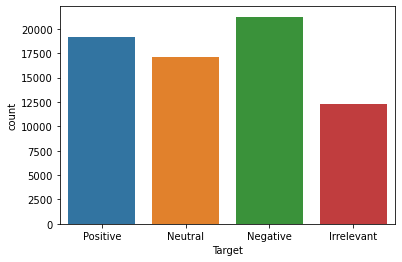

In [12]:
# Distributon of "Target" variable
sns.countplot(x="Target",data=df)

In [13]:
# Adding new column "Sentiment" with values: 1-Positive, 0-Irrelevant or Neutral and -1-Negative
sentiment = []

for i in df["Target"]:
    if i == "Positive":
        sentiment.append(1)
    elif (i == "Irrelevant") or (i == "Neutral"):
        sentiment.append(0)
    else:
        sentiment.append(-1)
df["Sentiment"] = sentiment

In [14]:
df.head()

,Text,Target,Sentiment
0,I am coming to the borders and I will kill you...,Positive,1
1,im getting on borderlands and i will kill you ...,Positive,1
2,im coming on borderlands and i will murder you...,Positive,1
3,im getting on borderlands 2 and i will murder ...,Positive,1
4,im getting into borderlands and i can murder y...,Positive,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69772 entries, 0 to 74680
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       69768 non-null  object
 1   Target     69772 non-null  object
 2   Sentiment  69772 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ MB


In [16]:
#stop_words: Is important to know that stopwords have 23 languages supported by it. In our case, we use English language:
stop_words = set(stopwords.words("english"))

In [17]:
#replace: The replace() method returns a new string with some or all matches of a pattern replaced by a replacement
df["Text"] = df["Text"].str.replace("\d","")

In [18]:
#Defining cleaner
def cleaner(data):
    # Tokens
    tokens = word_tokenize(str(data).replace("'", "").lower()) 
    
    # Remove Puncs
    without_punc = [w for w in tokens if w.isalpha()]
    
    # Stopwords
    without_sw = [t for t in without_punc if t not in stop_words]
    
    # Lemmatize
    text_len = [WordNetLemmatizer().lemmatize(t) for t in without_sw]
    # Stem
    text_cleaned = [PorterStemmer().stem(w) for w in text_len]
    
    return " ".join(text_cleaned)

In [19]:
#Cleaner application
df["Text"] = df["Text"].apply(cleaner)
df["Text"].head()

0             come border kill
1       im get borderland kill
2    im come borderland murder
3     im get borderland murder
4     im get borderland murder
Name: Text, dtype: object

In [20]:
#Replacing
df["Text"]=df["Text"].str.replace("im","")
df["Text"].head()

0           come border kill
1        get borderland kill
2     come borderland murder
3      get borderland murder
4      get borderland murder
Name: Text, dtype: object

In [21]:
#Showing rare words
rare_words = pd.Series(" ".join(df["Text"]).split()).value_counts()
rare_words

game       10775
play        6816
get         5566
like        5149
go          4216
           ...  
greenam        1
estrang        1
omnipot        1
tute           1
meywv          1
Length: 22227, dtype: int64

In [22]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier

In [23]:
#Defining X and y
X = df["Text"]
y = df["Sentiment"]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30,random_state= 42)

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
#CountVectorizer converts a collection of documents to an array of token counts. 
vt = CountVectorizer(analyzer="word")
X_train_count = vt.fit_transform(X_train)
X_test_count = vt.transform(X_test)

In [26]:
print(X_train_count.toarray())
X_train_count

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<48840x20161 sparse matrix of type '<class 'numpy.int64'>'
	with 486315 stored elements in Compressed Sparse Row format>

X Test
              precision    recall  f1-score   support

          -1       0.72      0.78      0.75      6388
           0       0.77      0.72      0.75      8835
           1       0.72      0.73      0.72      5709

    accuracy                           0.74     20932
   macro avg       0.74      0.74      0.74     20932
weighted avg       0.74      0.74      0.74     20932

X Train
              precision    recall  f1-score   support

          -1       0.77      0.82      0.79     14850
           0       0.82      0.77      0.79     20561
           1       0.75      0.78      0.76     13429

    accuracy                           0.78     48840
   macro avg       0.78      0.79      0.78     48840
weighted avg       0.79      0.78      0.78     48840



<AxesSubplot:>

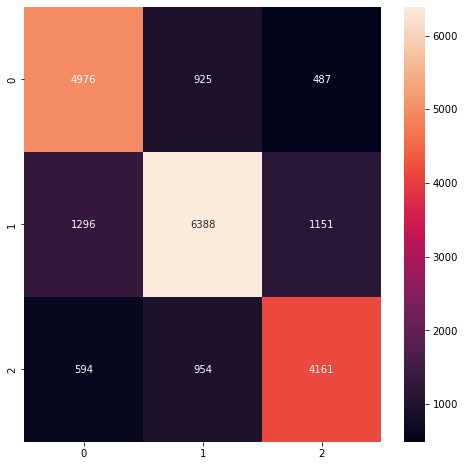

In [27]:
#MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_count,y_train)

nb_pred = nb_model.predict(X_test_count)
nb_train_pred = nb_model.predict(X_train_count)

print("X Test")
print(classification_report(y_test,nb_pred))
print("X Train")
print(classification_report(y_train,nb_train_pred))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,nb_pred),annot = True,fmt = "d")

In [28]:
from yellowbrick.classifier import PrecisionRecallCurve

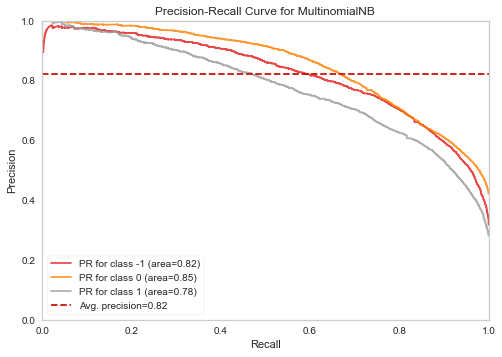

In [30]:
viz = PrecisionRecallCurve(MultinomialNB(),
                           classes=nb_model.classes_,   
                           per_class=True,  
                           cmap="Set1")
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)  
viz.show();

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
#RandomForestClassifier
rf_params = {"max_depth": [2,4,6,10,12],
            "max_features": [2,5,7],
            "n_estimators":[12,15,16,]}
rf = RandomForestClassifier()

rf_model_cv = GridSearchCV(rf,rf_params,cv = 5,n_jobs = -1)
rf_model_cv.fit(X_train_count,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 10, 12],
                         'max_features': [2, 5, 7],
                         'n_estimators': [12, 15, 16]})

In [33]:
rf_model_cv.best_params_

{'max_depth': 10, 'max_features': 7, 'n_estimators': 12}

X Test
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      6388
           0       0.42      1.00      0.59      8835
           1       0.00      0.00      0.00      5709

    accuracy                           0.42     20932
   macro avg       0.14      0.33      0.20     20932
weighted avg       0.18      0.42      0.25     20932

X Train
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     14850
           0       0.42      1.00      0.59     20561
           1       0.00      0.00      0.00     13429

    accuracy                           0.42     48840
   macro avg       0.14      0.33      0.20     48840
weighted avg       0.18      0.42      0.25     48840



<AxesSubplot:>

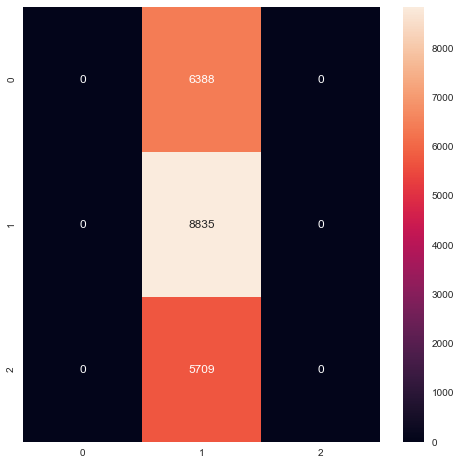

In [34]:
rf_tuned = RandomForestClassifier(max_depth = 12,
                                 max_features = 7,
                                 min_samples_split = 2).fit(X_train_count,y_train)

rf_pred = rf_tuned.predict(X_test_count)
rf_train_pred = rf_tuned.predict(X_train_count)

print("X Test")
print(classification_report(y_test,rf_pred))
print("X Train")
print(classification_report(y_train,rf_train_pred))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot = True,fmt = "d")

X Test
              precision    recall  f1-score   support

          -1       0.82      0.86      0.84      6388
           0       0.86      0.82      0.84      8835
           1       0.81      0.82      0.81      5709

    accuracy                           0.83     20932
   macro avg       0.83      0.83      0.83     20932
weighted avg       0.83      0.83      0.83     20932

X Train
              precision    recall  f1-score   support

          -1       0.91      0.94      0.92     14850
           0       0.93      0.92      0.92     20561
           1       0.92      0.90      0.91     13429

    accuracy                           0.92     48840
   macro avg       0.92      0.92      0.92     48840
weighted avg       0.92      0.92      0.92     48840



<AxesSubplot:>

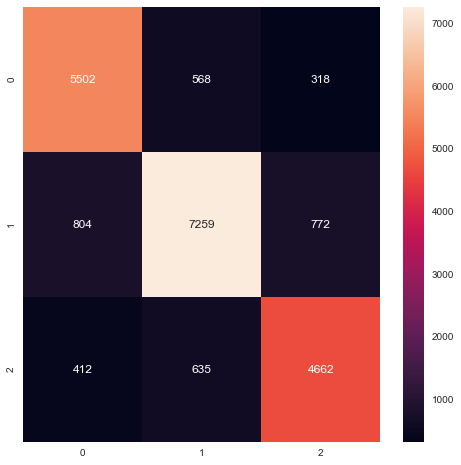

In [35]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train_count,y_train)
knn_pred = knn_model.predict(X_test_count)
knn_train_pred = knn_model.predict(X_train_count)
print("X Test")
print(classification_report(y_test,knn_pred))
print("X Train")
print(classification_report(y_train,knn_train_pred))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,knn_pred),annot = True,fmt = "d")

X Test
              precision    recall  f1-score   support

          -1       0.89      0.85      0.87      6388
           0       0.83      0.90      0.86      8835
           1       0.87      0.80      0.84      5709

    accuracy                           0.86     20932
   macro avg       0.86      0.85      0.86     20932
weighted avg       0.86      0.86      0.86     20932

X Train
              precision    recall  f1-score   support

          -1       0.95      0.90      0.92     14850
           0       0.89      0.95      0.92     20561
           1       0.93      0.88      0.90     13429

    accuracy                           0.92     48840
   macro avg       0.92      0.91      0.92     48840
weighted avg       0.92      0.92      0.92     48840



<AxesSubplot:>

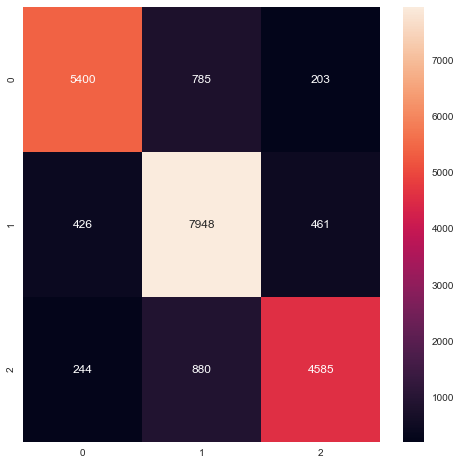

In [36]:
# Support-vector machines -Support Vector Classification
from sklearn.svm import SVC
svc_model = SVC().fit(X_train_count,y_train)
svc_pred = svc_model.predict(X_test_count)
svc_train_pred = svc_model.predict(X_train_count)
print("X Test")
print(classification_report(y_test,svc_pred))
print("X Train")
print(classification_report(y_train,svc_train_pred))

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,svc_pred),annot = True,fmt = "d")

In [37]:
pred_df = pd.DataFrame({"MultinomialNB":[accuracy_score(y_test,nb_pred)],
                      "Random Forest": [accuracy_score(y_test,rf_pred)],
                      "KNN": [accuracy_score(y_test,knn_pred)],
                       "SVC": [accuracy_score(y_test,svc_pred)]})

train_pred = pd.DataFrame({"MultinomialNB":[accuracy_score(y_train,nb_train_pred)],
                      "Random Forest": [accuracy_score(y_train,rf_train_pred)],
                      "KNN": [accuracy_score(y_train,knn_train_pred)],
                       "SVC": [accuracy_score(y_test,svc_pred)]})

<AxesSubplot:>

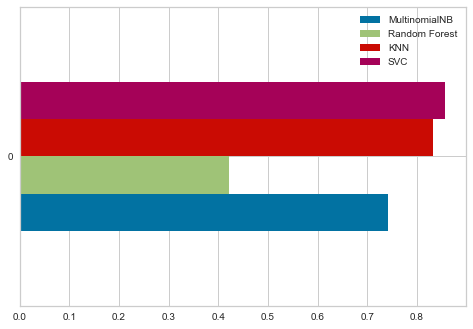

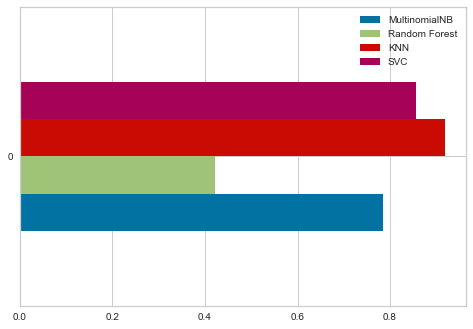

In [38]:
#Performance comparison
pred_df.plot(kind="barh")
train_pred.plot(kind="barh")